<a href="https://colab.research.google.com/github/quincey001/MachineLearning-/blob/master/006_multicollinearity_(ridge_regression%EF%BC%8C_lasso)_Polynomial_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 岭回归

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target

X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目","平均卧室数目","街区人口","平均入住率","街区的维度","街区的经度"]
X.head()
Xtrain, Xtest, Ytrain, Ytest = TTS(X, y, test_size = 0.3, random_state = 420)
for i in [Xtrain, Xtest]:
  i.index = np.arange(i.shape[0])
reg = Ridge(alpha = 1).fit(Xtrain, Ytrain)
print("score:",reg.score(Xtest, Ytest))#不是共线性问题

#
alpharange = np.arange(1,1001, 100)
ridge, lr = [],[]
for alpha in alpharange:
  reg = Ridge(alpha= alpha)
  linear = LinearRegression()
  regs = cross_val_score(reg, X, y, cv=5, scoring="r2").mean()
  linears = cross_val_score(linear, X, y, cv=5, scoring="r2").mean()
  ridge.append(regs)
  lr.append(linears)
plt.plot(alpharange, ridge, color="red", label="Ridge")
plt.plot(alpharange, lr, color="orange", label="LR")
plt.title("mean")
plt.legend()
plt.show()

## lasso

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target

X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目","平均卧室数目","街区人口","平均入住率","街区的维度","街区的经度"]
X.head()
Xtrain, Xtest, Ytrain, Ytest = TTS(X, y, test_size = 0.3, random_state = 420)
for i in [Xtrain, Xtest]:
  i.index = np.arange(i.shape[0])
#reg model
reg = Ridge(alpha = 1).fit(Xtrain, Ytrain)
print("score:",reg.score(Xtest, Ytest))#不是共线性问题

#linear regression
linear = LinearRegression().fit(Xtrain, Ytrain)
(linear.coef_*100).tolist()
# lasso model
lasso_ = Lasso(alpha = 0).fit(Xtrain, Ytrain)
(lasso_.coef_*100).tolist() 


score: 0.6043610352312281


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3769.8607714139116, tolerance: 1.917255476913148
  positive)


[43.73589305968403,
 1.0211268294494051,
 -10.780721617317674,
 62.64338275363782,
 5.216125353265936e-05,
 -0.3348509646333569,
 -41.30959378947719,
 -42.62109536208477]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, LassoCV
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target

X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目","平均卧室数目","街区人口","平均入住率","街区的维度","街区的经度"]
X.head()
Xtrain, Xtest, Ytrain, Ytest = TTS(X, y, test_size = 0.3, random_state = 420)
for i in [Xtrain, Xtest]:
  i.index = np.arange(i.shape[0])
from sklearn.linear_model import LarsCV
alpharange = np.logspace(-10, -2, 200, base = 10)
# 10^(-10)到10^(-2) 200个值
# lasso_ = LassoCV(alphas=alpharange,cv=5).fit(Xtrain, Ytrain)
ls_ = LassoCV(eps=0.00001, n_alphas=300, cv=5).fit(Xtrain, Ytrain)#eps 正则化路径长度 300个alphas取值
print("ls_alpha",ls_.alpha_)
print("ls_coeffient",ls_.coef_)
print("ls_score",ls_.score(Xtest, Ytest))
# print("alpha",lasso_.alpha_)
# print("coeffient",lasso_.coef_)
# print("score",lasso_.score(Xtest, Ytest))

## Polynomial Features

In [ ]:
#原数据是一维
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.arange(1, 4).reshape(-1,1)
poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(X)
print(X_)

poly_ = PolynomialFeatures(degree=3, include_bias=False)
X1 = poly_.fit_transform(X)
print(X1)

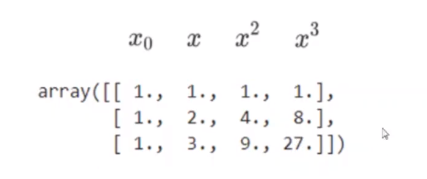

## 数据是二维的情况

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.arange(6).reshape(3,2)
print(X)
X_ = PolynomialFeatures(degree=2,interaction_only=True).fit_transform(X)#interation_only avoid multicollinearity
print(X_)

[[0 1]
 [2 3]
 [4 5]]
[[ 1.  0.  1.  0.]
 [ 1.  2.  3.  6.]
 [ 1.  4.  5. 20.]]


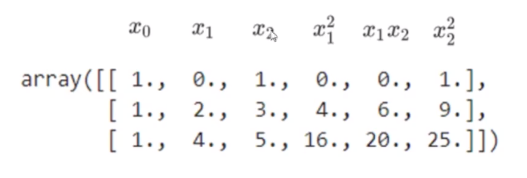

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

rnd = np.random.RandomState(42)#设置随机数种子
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) +rnd.normal(size=len(X)) / 3

#将X升维，准备好放入sklearn 中
X = X.reshape(-1, 1)

#创建测试数据，均匀分布在训练集X 的取值范围内的一千个点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

LinearR = LinearRegression().fit(X, y)
print(LinearR.score(X, y))

#对测试数据的拟合
print(LinearR.score(line, np.sin(line)))



#进行多项式的拟合，设定高次项
d = 5
#进行高次项转换
poly = PolynomialFeatures(degree=d)
X_ = poly.fit_transform(X)
line_ = PolynomialFeatures(degree=d).fit_transform(line)

#训练数据的拟合
LinearR_ = LinearRegression().fit(X_, y)
print(LinearR_.score(X_, y))
print(LinearR_.score(line_, np.sin(line)))

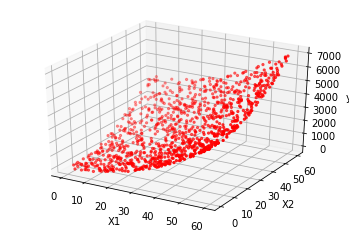

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model

from mpl_toolkits.mplot3d import Axes3D

X_train = np.random.rand(2000).reshape(1000,2)*60
y_train = (X_train[:, 0]**2)+(X_train[:, 1]**2)
X_test = np.random.rand(200).reshape(100,2)*60
y_test = (X_test[:, 0]**2)+(X_test[:, 1]**2)
# print(X_test)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='.', color='red')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")

model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# print("MAE: {}".format(np.abs(y_test-y_pred).mean()))
# print("RMSE: {}".format(np.sqrt(((y_test-y_pred)**2).mean())))

# coefs = model.coef_
# intercept = model.intercept_
# xs = np.tile(np.arange(61), (61,1))
# ys = np.tile(np.arange(61), (61,1)).T
# zs = xs*coefs[0]+ys*coefs[1]+intercept
# print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(intercept, coefs[0],
#                                                           coefs[1]))

# ax.plot_surface(xs,ys,zs, alpha=0.5)
# plt.show()